# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

631

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
name = []
cloudiness = []
country = []
date = []
humidity = []
temp = []
lat = []
lng = []
wind = []

In [4]:
record_counter = 0
set_counter = 0

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


print('Beginning Data Retrieval')
print('------------------------')
for city in cities:
    query_url = url + "&q=" + city
    # Get weather data
    response = requests.get(query_url).json()
    if record_counter < 50:
        record_counter += 1
    else:
        set_counter += 1
        record_counter = 0

    print('Processing record {} of set {} | {}'.format(record_counter, set_counter, city))

    try:
         
        name.append(response['name'])
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        temp.append(response['main']['temp_max'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        wind.append(response['wind']['speed'])

        
        
 # Wait a second in loop to not over exceed rate limit of API
        time.sleep(1.01)  
    
    except(KeyError):
        print(f'City not found!')
        pass
    
print('-------------------------')
print('Data Retrieval Complete')
print('-------------------------')
    
    

Beginning Data Retrieval
------------------------
Processing record 1 of set 0 | mataura
Processing record 2 of set 0 | albany
Processing record 3 of set 0 | greymouth
Processing record 4 of set 0 | ushuaia
Processing record 5 of set 0 | hofn
Processing record 6 of set 0 | coquimbo
Processing record 7 of set 0 | aksu
Processing record 8 of set 0 | palabuhanratu
City not found!
Processing record 9 of set 0 | hobart
Processing record 10 of set 0 | salto
Processing record 11 of set 0 | katsuura
Processing record 12 of set 0 | mys shmidta
City not found!
Processing record 13 of set 0 | coihaique
Processing record 14 of set 0 | illoqqortoormiut
City not found!
Processing record 15 of set 0 | dikson
Processing record 16 of set 0 | bandarbeyla
Processing record 17 of set 0 | mar del plata
Processing record 18 of set 0 | acu
Processing record 19 of set 0 | port macquarie
Processing record 20 of set 0 | nisia floresta
Processing record 21 of set 0 | bethel
Processing record 22 of set 0 | punta 

Processing record 39 of set 3 | vila franca do campo
Processing record 40 of set 3 | hasaki
Processing record 41 of set 3 | iqaluit
Processing record 42 of set 3 | codrington
Processing record 43 of set 3 | hay river
Processing record 44 of set 3 | ipixuna
Processing record 45 of set 3 | kavaratti
Processing record 46 of set 3 | yar-sale
Processing record 47 of set 3 | temaraia
City not found!
Processing record 48 of set 3 | tsihombe
City not found!
Processing record 49 of set 3 | port lincoln
Processing record 50 of set 3 | solnechnyy
Processing record 0 of set 4 | daxian
City not found!
Processing record 1 of set 4 | barranca
Processing record 2 of set 4 | taltal
Processing record 3 of set 4 | khatanga
Processing record 4 of set 4 | vallenar
Processing record 5 of set 4 | tuktoyaktuk
Processing record 6 of set 4 | aksha
Processing record 7 of set 4 | gasa
Processing record 8 of set 4 | guiglo
Processing record 9 of set 4 | san felipe
Processing record 10 of set 4 | los llanos de arid

Processing record 28 of set 7 | deshna
City not found!
Processing record 29 of set 7 | novaya ladoga
Processing record 30 of set 7 | gulshat
City not found!
Processing record 31 of set 7 | katobu
Processing record 32 of set 7 | honggang
Processing record 33 of set 7 | sakaiminato
Processing record 34 of set 7 | moramanga
Processing record 35 of set 7 | iberia
Processing record 36 of set 7 | avera
Processing record 37 of set 7 | sisimiut
Processing record 38 of set 7 | huilong
Processing record 39 of set 7 | maraa
Processing record 40 of set 7 | touros
Processing record 41 of set 7 | krosno odrzanskie
Processing record 42 of set 7 | hobyo
Processing record 43 of set 7 | khandbari
Processing record 44 of set 7 | severo-kurilsk
Processing record 45 of set 7 | palana
Processing record 46 of set 7 | peleduy
Processing record 47 of set 7 | gympie
Processing record 48 of set 7 | doha
Processing record 49 of set 7 | tocopilla
Processing record 50 of set 7 | paka
Processing record 0 of set 8 | 

Processing record 19 of set 11 | najran
Processing record 20 of set 11 | nombre de dios
Processing record 21 of set 11 | yulara
Processing record 22 of set 11 | imbituba
Processing record 23 of set 11 | eureka
Processing record 24 of set 11 | qaqortoq
Processing record 25 of set 11 | plouzane
Processing record 26 of set 11 | diffa
Processing record 27 of set 11 | arman
Processing record 28 of set 11 | guamal
Processing record 29 of set 11 | one hundred mile house
City not found!
Processing record 30 of set 11 | voloshka
Processing record 31 of set 11 | sayyan
Processing record 32 of set 11 | senno
Processing record 33 of set 11 | nguiu
City not found!
Processing record 34 of set 11 | luganville
Processing record 35 of set 11 | cabedelo
Processing record 36 of set 11 | auki
Processing record 37 of set 11 | kholm
Processing record 38 of set 11 | north vanlaiphai
Processing record 39 of set 11 | comrat
Processing record 40 of set 11 | dujuma
City not found!
Processing record 41 of set 11 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [15]:
weatherpy_dict = {
    "City":name,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp":temp,
    "Humidity":humidity,
    "Cloudiness":cloudiness,
    "Wind Speed":wind,
    "Country":country,
    "Date":date    
}

weather_data_df = pd.DataFrame(weatherpy_dict)
weather_data_df.head()

weather_data_df.to_csv("../WeatherPy/cities.csv")

In [6]:
weather_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mataura,-46.1927,168.8643,43.56,92,35,2.08,NZ,1612367363
1,Albany,42.6001,-73.9662,30.99,72,100,3.00,US,1612367286
2,Greymouth,-42.4667,171.2000,56.61,88,13,6.11,NZ,1612367365
3,Ushuaia,-54.8000,-68.3000,53.60,50,40,26.46,AR,1612367367
4,Hofn,64.2539,-15.2082,33.80,64,75,11.50,IS,1612367368


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [16]:
humidity_test = weather_data_df["Humidity"].describe(include = "all")
humidity_test


count    577.000000
mean      71.616984
std       20.145924
min        8.000000
25%       62.000000
50%       76.000000
75%       87.000000
max      100.000000
Name: Humidity, dtype: float64

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

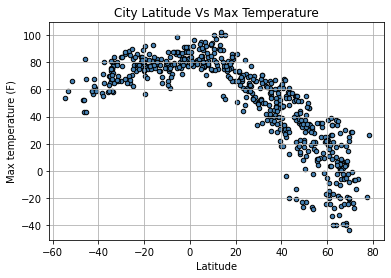

In [17]:
weather_data_df.plot(kind='scatter', x='Lat', y='Max Temp', c='SteelBlue', edgecolor = "black")
plt.title('City Latitude Vs Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max temperature (F)')
plt.grid()
plt.savefig("../WeatherPy/LatitudeVsTemperature.png")

In [ ]:
The highest temperatures are found at 0 latitude. As latidude increases the temperature drops.

## Latitude vs. Humidity Plot

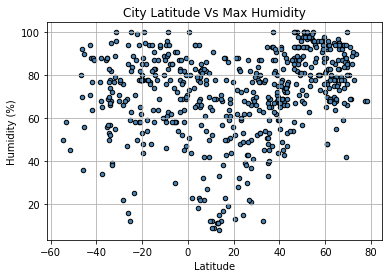

In [18]:
weather_data_df.plot(kind='scatter',x='Lat',y='Humidity', c='SteelBlue', edgecolor = "black")
plt.title('City Latitude Vs Max Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()
plt.savefig("../WeatherPy/LatitudeVsHumidity.png")

In [ ]:
As latitude incleases,humidity increases in southern hemisphere.

## Latitude vs. Cloudiness Plot

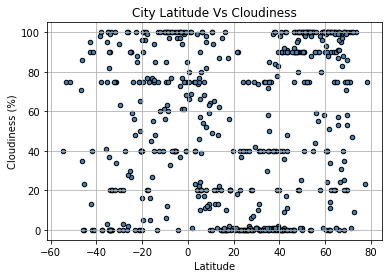

In [19]:
weather_data_df.plot(kind='scatter',x='Lat',y='Cloudiness', c='SteelBlue', edgecolor = "black")
plt.title('City Latitude Vs Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
plt.savefig("../WeatherPy/LatitudeVsCloudiness.png")

In [ ]:
Cloudiness data varies greatly across the latitude.

## Latitude vs. Wind Speed Plot

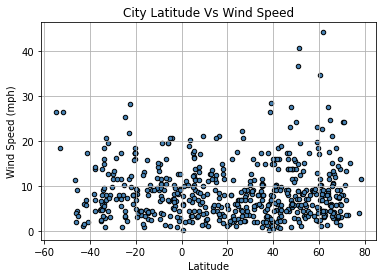

In [20]:
weather_data_df.plot(kind='scatter',x='Lat',y='Wind Speed', c='SteelBlue', edgecolor = "black")
plt.title('City Latitude Vs Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()
plt.savefig("../WeatherPy/LatitudeVsWindSpeed.png")

In [ ]:
Wind speed data varies greatly across the latitude.

## Linear Regression

In [35]:
northern_hemisphere = weather_data_df.loc[weather_data_df["Lat"] >= 0]
southern_hemisphere = weather_data_df.loc[weather_data_df["Lat"] < 0]


def linear_regression(x,y):
    print(f"The r-squared is : {round(st.pearsonr(x, y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    return line_eq

# Define a fuction for annotating
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : -0.87


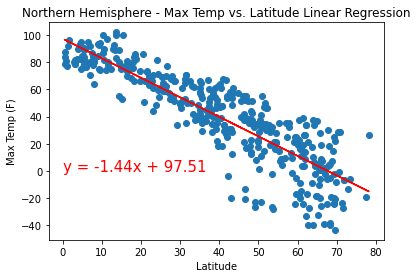

In [60]:
equation = linear_regression(northern_hemisphere["Lat"], northern_hemisphere["Max Temp"])
annotate(equation, 0, 0)

plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")

# Save the figure
plt.savefig("../WeatherPy/Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

In [ ]:
There is a strong negative correlation between latitude and max temperature in the northern hemisphere.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : 0.61


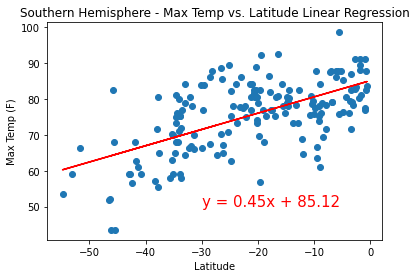

In [62]:
equation = linear_regression(southern_hemisphere["Lat"],southern_hemisphere["Max Temp"])
annotate(equation, -30, 50)

plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")

# Save the figure
plt.savefig("../WeatherPy/Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

In [ ]:
There is a positive correlation between latitude and max temperature in the southern hemisphere.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.47


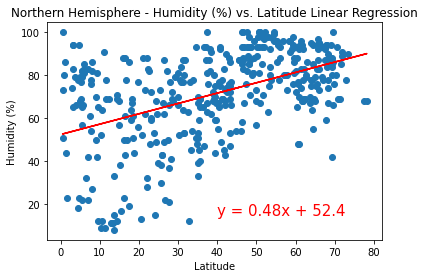

In [63]:
equation = linear_regression(northern_hemisphere["Lat"], northern_hemisphere["Humidity"])
annotate(equation, 40, 15)

plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("../WeatherPy/Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

In [ ]:
There is a positive correlation between latitude and humidity in the northern hemisphere.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.09


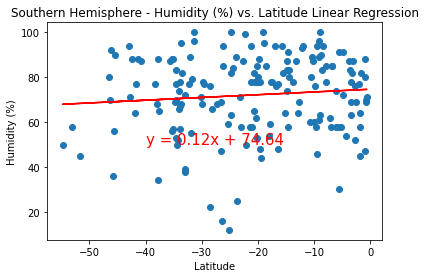

In [64]:
equation = linear_regression(southern_hemisphere["Lat"], southern_hemisphere["Humidity"])
annotate(equation, -40, 50)

plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("../WeatherPy/Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

In [ ]:
There is a minimal positive correlation between latitude and humidity in the southern hemisphere.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.32


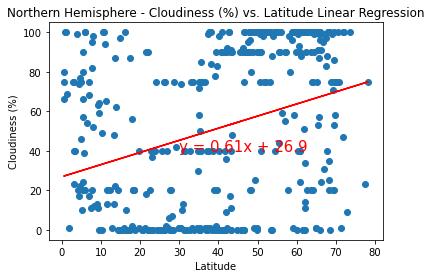

In [65]:
equation = linear_regression(northern_hemisphere["Lat"], northern_hemisphere["Cloudiness"])
annotate(equation, 30, 40)

plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("../WeatherPy/Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

In [ ]:
There is a positive correlation between latitude and cloudiness in the northern hemisphere.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.28


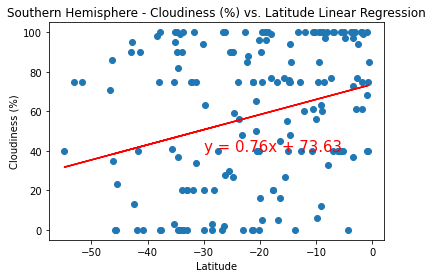

In [66]:
equation = linear_regression(southern_hemisphere["Lat"], southern_hemisphere["Cloudiness"])
annotate(equation, -30, 40)

plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("../WeatherPy/Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

In [ ]:
There is a positive correlation between latitude and cloudiness in the southern hemisphere.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : 0.08


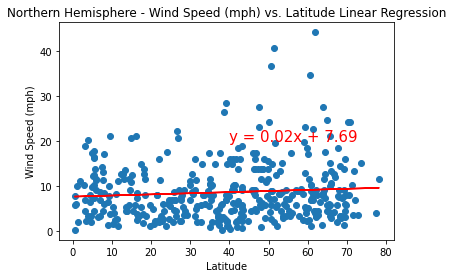

In [67]:
equation = linear_regression(northern_hemisphere["Lat"], northern_hemisphere["Wind Speed"])
annotate(equation, 40, 20)

plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Save the figure
plt.savefig("../WeatherPy/Northern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")

In [ ]:
There is a slight positive correlation between latitude and windspeed in the northern hemisphere.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : -0.06


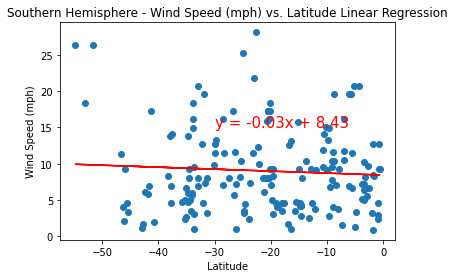

In [68]:
equation = linear_regression(southern_hemisphere["Lat"], southern_hemisphere["Wind Speed"])
annotate(equation, -30, 15)

plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Save the figure
plt.savefig("../WeatherPy/Southern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")

In [ ]:
There is a slight negative correlation between latitude and wind speed in the southern hemisphere.